# 프로젝트 - Movielens 영화 추천 실습

### 추천 시스템이란?

온라인 콘텐츠 서비스에서 데이터 분석과 AI 기술을 접목한 추천 시스템의 활용은 이제 필수가 된 것 같다.  
이젠 흔히 사용하고 있는 OTT(over-the-top) 플랫폼 중 넷플릭스의 예로 알아보자.

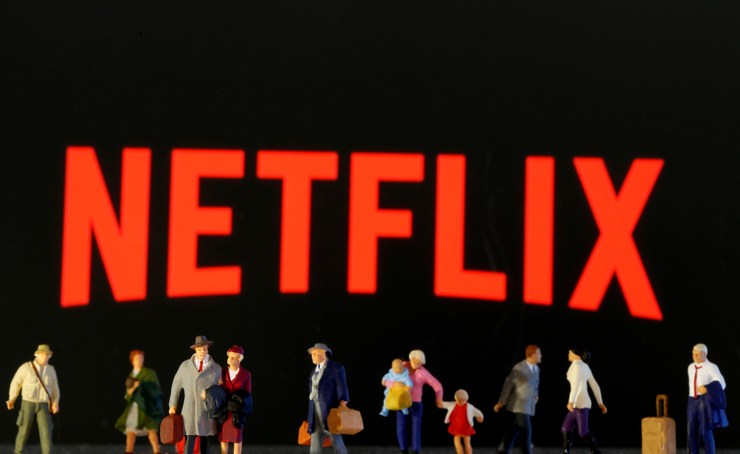

- 넷플릭스 고객센터에서는 아래와 같이 제공하고 있다.

>### [넷플릭스의 추천 콘텐츠 시스템 작동 방법](https://help.netflix.com/ko/node/100639)
>
>넷플릭스는 개인화된 **추천 콘텐츠를 제공**하여 관심 있는 TV 프로그램 및 영화를 쉽게 찾도록 도와주는 멤버십 서비스입니다.  
이러한 비즈니스 모델의 구현을 위해 **복합 추천 콘텐츠 시스템을 독점적으로 구축**했습니다.
>
>**기본 사항**
>
>회원이 넷플릭스 서비스에 액세스할 때마다 넷플릭스 추천 콘텐츠 시스템이 작동하여  
최소한의 노력으로 좋아하는 TV 프로그램 또는 영화를 찾도록 도와줍니다.  
넷플릭스는 다음과 같은 다양한 요소를 기반으로 회원이 **카탈로그에 있는 특정 콘텐츠를 시청할 가능성을 추정**합니다.
>
>- 넷플릭스 서비스와의 상호작용(시청 기록, 다른 콘텐츠 평가 결과 등)
>
>- 유사한 취향을 가진 회원 및 넷플릭스 서비스에서의 선호 대상
>
>- 장르, 카테고리, 배우, 출시연도 등 콘텐츠 관련 정보
>
>회원이 넷플릭스에서 시청한 콘텐츠를 파악할 뿐 아니라 개인화된 추천 콘텐츠를 최적화하기 위해 다음 항목도 고려합니다.
>
>- 하루 중 시청 시간대
>
>- 넷플릭스를 시청하는 디바이스
>
>- 시청 시간
>
>이러한 데이터 하나하나를 입력 정보로 사용해 넷플릭스 알고리즘에서 처리합니다.  
(알고리즘이란 문제 해결 과정에서 따르는 절차 또는 규칙 집합입니다.)  
추천 콘텐츠 시스템은 인구통계 정보(연령, 성별 등)를 의사결정 절차의 일부로 포함하지 않습니다.
>
>**추천 콘텐츠 시스템 '바로 시작'**
>
>넷플릭스 계정을 생성하거나 계정에 새 프로필을 추가할 때 회원에게 **좋아하는 콘텐츠를 몇 개 선택하도록 요청**합니다. 이러한 콘텐츠를 사용하여 **추천 콘텐츠 시스템을 '바로 시작'**합니다. 좋아하는 콘텐츠를 몇 개 선택하는 것은 선택 사항입니다. 이 단계를 생략하는 경우, 여러 인기 콘텐츠들로 시작하게 됩니다.
>
>회원이 넷플릭스에서 콘텐츠를 시청하기 시작하면 이러한 콘텐츠가 **처음에 선택했던 선호 콘텐츠를 '대체'**합니다. 또한 계속 시청함에 따라, **최근 시청한 콘텐츠의 중요도**가 **이전에 시청한 콘텐츠**보다 **추천 콘텐츠 시스템 작동 면에서 높아지게** 됩니다.

### 추천시스템은 어떻게 동작할까?

- [넷플릭스, 왓챠…OTT플랫폼의 추천시스템은 어떻게 동작할까?](https://www.itbiznews.com/news/articleView.html?idxno=45731)


- [추천 시스템 알고리즘 종류 무작정 정리](https://blog.naver.com/hongjg3229/222169769919)


- [추천 시스템 Basics](https://www.notion.so/Basics-4487ed5d90f94ad490879401c7801293)


### 협업 필터링(Collaborative Filtering) 과 콘텐츠 기반 필터링(Contents-based Filtering) 방식의 차이

1. **협업 필터링**
- 다수의 사용자의 아이템 구매 이력 정보만으로 사용자간 유사성 및 아이템 간 유사성을 파악
- **아이템과 사용자 간의 행동 또는 관계에만 주목**할 뿐 아이템 자체의 고유한 속성에 주목하지 않는다.

2. **콘텐츠 기반 필터링**
- 아이템의 고유의 정보를 바탕으로 아이템 간 유사성을 파악
- **아이템 자체의 속성**에만 주목하고 **사용자와 아이템 간의 관련성** 에는 주목하지 않는다.

### Movielens 데이터셋으로 영화추천 시스템 만들기

[MF(Matrix factorization)](https://blog.naver.com/PostView.naver?blogId=shino1025&logNo=222394488801) 모델 학습 방법을 토대로, 내가 좋아할 만한 영화 추천 시스템을 제작해 보자.

- Movielens 데이터셋(추천 시스템의 MNIST)

    - 유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있다. **MovieLens 1M Dataset** 사용
    - 별점 데이터는 대표적인 explicit 데이터지만 implicit 데이터로 간주하고 테스트
    - 별점을 **시청횟수**로 해석해서 진행하고 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외

`ml-1m`폴더 내 파일을 아래와 같이 심볼릭 링크로 개인 storage에 연결해 주자.

```
$ mkdir -p ~/aiffel/recommendata_iu/data/ml-1m
$ ln -s ~/data/ml-1m/* ~/aiffel/recommendata_iu/data/ml-1m
```

### 1) 데이터 준비와 전처리
___

Movielens 데이터는 `rating.dat` 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있다.



In [1]:
import pandas as pd
import os

rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path,
                      sep='::', 
                      names=ratings_cols, 
                      engine='python', 
                      encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
print("Data Load OK")

Data Load OK


In [2]:
ratings

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
ratings.sample(10)

,user_id,movie_id,ratings,timestamp
38534,262,2916,3,976660203
842553,5063,1777,4,976578321
714377,4279,2406,4,965286007
971568,5854,1517,3,958273144
461274,2846,1197,5,972526175
362246,2110,3755,2,974650994
316704,1884,2661,4,975648333
419473,2536,440,4,974063040
432650,2638,1125,3,980119860
77591,524,2178,5,976165680


In [4]:
# 영화별 별점(시청횟수) 비율
ratings_count = ratings.groupby(by=['ratings']).agg({'user_id': 'count'}).reset_index()
ratings_count.columns = ['Ratings', 'Count']

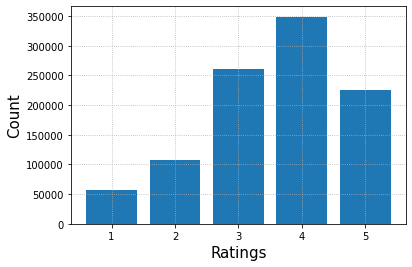

In [5]:
import matplotlib.pyplot as plt

plt.bar(ratings_count.Ratings, ratings_count.Count)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(ls='dotted')
plt.show()

- 별점(시청횟수)가 3점 이상이 많은 것이 확인된다.

In [6]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


- 별점(시청횟수) 3점 미만인 영화는 선호하지 않는 것으로 가정하여 제외(약 16%)

In [7]:
ratings

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [8]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
# ratings['counts']
ratings

,user_id,movie_id,counts,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
ratings.sample(10)

,user_id,movie_id,counts,timestamp
425617,2583,3256,5,974073572
39240,266,3004,3,976646410
475267,2917,745,4,974241699
125697,808,1089,4,975431123
304415,1808,1020,3,974697637
910783,5511,1427,3,959717127
726535,4345,339,3,966270589
61881,415,1207,5,977501091
275689,1667,173,3,975018012
456914,2814,2424,4,1035674098


In [11]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, 
                     sep='::', 
                     names=cols, 
                     engine='python', 
                     encoding='ISO-8859-1')
print("Data Load OK")

Data Load OK


In [12]:
movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [13]:
movies.sample(10)

,movie_id,title,genre
3758,3828,Better Living (1998),Comedy
3510,3579,I Dreamed of Africa (2000),Drama
1920,1989,Prom Night III: The Last Kiss (1989),Horror
2975,3044,Dead Again (1991),Mystery|Romance|Thriller
1330,1351,Blood & Wine (1997),Drama
1338,1359,Jingle All the Way (1996),Adventure|Children's|Comedy
2733,2802,Tequila Sunrise (1988),Action|Romance|Thriller
2823,2892,New Rose Hotel (1998),Action|Drama
167,169,Free Willy 2: The Adventure Home (1995),Adventure|Children's|Drama
742,752,Vermont Is For Lovers (1992),Comedy|Romance


- ratings dataframe과 movies dataframe 을 합치자.

In [14]:
ratings = ratings.join(movies.set_index('movie_id'), on='movie_id')
ratings.head()

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


- 전처리가 되었다. 이젠 데이터 분석을 해보자.

### 2) 데이터 분석
___

- ratings에 있는 유니크한 영화 개수
- ratings에 있는 유니크한 사용자 수
- 가장 인기 있는 영화 30개(인기순)

- `pandas.DataFrame.nunique()`은 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용하다.

In [15]:
# 유니크한 영화 개수
print(f"유니크한 영화 개수 : {ratings['movie_id'].nunique()}개")

유니크한 영화 개수 : 3628개


In [16]:
# 유니크한 사용자 수
print(f"유니크한 사용자 수 : {ratings['user_id'].nunique()}명")

유니크한 사용자 수 : 6039명


In [17]:
# 가장 인기 있는 영화 30개(인기순)
movie_count = ratings.groupby('title')['movie_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

- 가장 인기 있는 영화는 1999년에 개봉한 American Beauty 로 확인된다.
- 극장에서만 3번을 봤었던 `Terminator 2: Judgment Day (1991)`가 6위에 있는 것을 보며
- 첫 장면에서 세번 다 놀랐었던 기억이 떠오르며 미소짓게 해주었다.

In [18]:
# 유저별 몇 편의 영화를 감상했는지에 대한 통계
user_count = ratings.groupby('user_id')['title'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: title, dtype: float64

In [19]:
# 유저별 영화감상 횟수 중앙값에 대한 통계
user_median = ratings.groupby('user_id')['counts'].median()
user_median.describe()

count    6039.000000
mean        4.055970
std         0.432143
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: counts, dtype: float64

### 3) 내가 선호하는 영화를 5가지 골라서 ratings에 추가해 줍시다.
___

### 사용자 초기 정보 세팅

> 위 프로젝트 처음에 넷플릭스가 추천 콘텐츠 시스템을 활용하여 좋아하는 TV 프로그램 또는  
영화를 찾도록 도와주는 내용을 참고하여 `내가 좋아하는 영화 5가지`를 `초기 정보값`으로 입력해 주자.



In [20]:
# 영화 제목 키워드로 검색(소문자로 변환하여 키워드를 포함하는 영화 제목 검색)
movies[movies['title'].str.lower().str.contains('terminator', regex=False)]

,movie_id,title,genre
585,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
1220,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller


In [21]:
movies[movies['title'].str.lower().str.contains('mission:', regex=False)]

,movie_id,title,genre
642,648,Mission: Impossible (1996),Action|Adventure|Mystery
3554,3623,Mission: Impossible 2 (2000),Action|Thriller


In [22]:
movies[movies['title'].str.lower().str.contains('matrix', regex=False)]

,movie_id,title,genre
2502,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


- 위에서 검색한 영화 5편을 "id"와  "title"리스트 만들자.
- user_id = castle_money, 5편의 영화 각각을 5번씩 감상했다고 가정

In [23]:
# 내가 좋아하는 5편의 movie_id 추가! 
my_hot_mv_id = [589, 1240, 648, 3623, 2571]

my_hot_mv_title = []
for id in my_hot_mv_id:
    my_hot_mv_title.extend(list(movies[movies['movie_id'] == id]['title']))

my_hot_mv_list = pd.DataFrame({'user_id': ['castle_money']*5, 
                               'movie_id': my_hot_mv_id, 
                               'counts': [5]*5, 
                               'title': my_hot_mv_title})
my_hot_mv_list

,user_id,movie_id,counts,title
0,castle_money,589,5,Terminator 2: Judgment Day (1991)
1,castle_money,1240,5,"Terminator, The (1984)"
2,castle_money,648,5,Mission: Impossible (1996)
3,castle_money,3623,5,Mission: Impossible 2 (2000)
4,castle_money,2571,5,"Matrix, The (1999)"


- ratings dataframe에 위에서 만든 mv_hot-mv_list dataframe을 추가하자.

In [24]:
if not ratings.isin({'user_id':['castle_money']})['user_id'].any():
    ratings = ratings.append(my_hot_mv_list, ignore_index=True)

ratings.tail(10)

,user_id,movie_id,counts,timestamp,title,genre
836473,6040,1090,3,956715518.0,Platoon (1986),Drama|War
836474,6040,1094,5,956704887.0,"Crying Game, The (1992)",Drama|Romance|War
836475,6040,562,5,956704746.0,Welcome to the Dollhouse (1995),Comedy|Drama
836476,6040,1096,4,956715648.0,Sophie's Choice (1982),Drama
836477,6040,1097,4,956715569.0,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
836478,castle_money,589,5,NaN,Terminator 2: Judgment Day (1991),NaN
836479,castle_money,1240,5,NaN,"Terminator, The (1984)",NaN
836480,castle_money,648,5,NaN,Mission: Impossible (1996),NaN
836481,castle_money,3623,5,NaN,Mission: Impossible 2 (2000),NaN
836482,castle_money,2571,5,NaN,"Matrix, The (1999)",NaN


- "timestamp"와 "genre"는 불필요하기에 삭제하자.

In [25]:
del ratings['timestamp']

In [26]:
del ratings['genre']

In [27]:
ratings

,user_id,movie_id,counts,title
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,James and the Giant Peach (1996)
2,1,914,3,My Fair Lady (1964)
3,1,3408,4,Erin Brockovich (2000)
4,1,2355,5,"Bug's Life, A (1998)"
...,...,...,...,...
836478,castle_money,589,5,Terminator 2: Judgment Day (1991)
836479,castle_money,1240,5,"Terminator, The (1984)"
836480,castle_money,648,5,Mission: Impossible (1996)
836481,castle_money,3623,5,Mission: Impossible 2 (2000)


### 4) CSR matrix를 직접 만들어 보자.
___


- "user_id"와 "title"(영화제목)을 고유한 갯수 만큼 indexing

In [28]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = ratings['user_id'].unique()
movie_unique = ratings['title'].unique()

# 유저, 영화 indexing 하는 코드
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [29]:
len(user_unique)

6040

In [30]:
user_to_idx

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [31]:
len(movie_to_idx)

3628

In [32]:
movie_to_idx

{"One Flew Over the Cuckoo's Nest (1975)": 0,
 'James and the Giant Peach (1996)': 1,
 'My Fair Lady (1964)': 2,
 'Erin Brockovich (2000)': 3,
 "Bug's Life, A (1998)": 4,
 'Princess Bride, The (1987)': 5,
 'Ben-Hur (1959)': 6,
 'Christmas Story, A (1983)': 7,
 'Snow White and the Seven Dwarfs (1937)': 8,
 'Wizard of Oz, The (1939)': 9,
 'Beauty and the Beast (1991)': 10,
 'Gigi (1958)': 11,
 'Miracle on 34th Street (1947)': 12,
 "Ferris Bueller's Day Off (1986)": 13,
 'Sound of Music, The (1965)': 14,
 'Airplane! (1980)': 15,
 'Tarzan (1999)': 16,
 'Bambi (1942)': 17,
 'Awakenings (1990)': 18,
 'Big (1988)': 19,
 'Pleasantville (1998)': 20,
 'Wallace & Gromit: The Best of Aardman Animation (1996)': 21,
 'Back to the Future (1985)': 22,
 "Schindler's List (1993)": 23,
 'Meet Joe Black (1998)': 24,
 'Pocahontas (1995)': 25,
 'E.T. the Extra-Terrestrial (1982)': 26,
 'Titanic (1997)': 27,
 'Ponette (1996)': 28,
 'Close Shave, A (1995)': 29,
 'Antz (1998)': 30,
 'Girl, Interrupted (1999)':

In [33]:
user_to_idx[6040]

6038

In [34]:
# 인덱싱이 잘 되었는지 확인해 보자. 
print(user_to_idx['castle_money'])    # 6040명의 유저 중 마지막으로 추가된 유저이니 6039가 나와야 한다. 
print(movie_to_idx['Mission: Impossible 2 (2000)'])

6039
482


- "ratings"의 "user_id"와 "title" 컬럼의 모든 값을 인덱스 값으로 변경

In [35]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # ratings['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# movie_to_idx을 통해 movie 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = ratings['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(ratings):
    print('title column indexing OK!!')
    ratings['title'] = temp_movie_data
else:
    print('title column indexing Fail!!')

ratings

user_id column indexing OK!!
title column indexing OK!!


,user_id,movie_id,counts,title
0,0,1193,5,0
1,0,661,3,1
2,0,914,3,2
3,0,3408,4,3
4,0,2355,5,4
...,...,...,...,...
836478,6039,589,5,92
836479,6039,1240,5,200
836480,6039,648,5,58
836481,6039,3623,5,482


- 컬럼 내 값들이 모두 정수 인덱스 값으로 잘 변경된 것을 확인할 수 있다. 훈련을 위한 전처리가 완료되었다!!

- 영화 감상 횟수 별 데이터의 비율은 어떻게 될까?

In [36]:
# 감상 횟수 별 영화 비율을 보는 코드
only_three = ratings[ratings['counts']==3]
only_four = ratings[ratings['counts']==4]
only_five = ratings[ratings['counts']==5]

three, four, five, all_data = len(only_three), len(only_four), len(only_five), len(ratings)

print(f'3회 : {three},  4회 : {four},  5회 : {five},  총 : {all_data}')
# f-format에 대한 설명은 https://bit.ly/2DTLqYU
print(f'Ratio of "only_three" over all data is {three/all_data:.2%}')  
print(f'Ratio of "only_four" over all data is {four/all_data:.2%}')  
print(f'Ratio of "only_five" over all data is {five/all_data:.2%}')  

3회 : 261197,  4회 : 348971,  5회 : 226315,  총 : 836483
Ratio of "only_three" over all data is 31.23%
Ratio of "only_four" over all data is 41.72%
Ratio of "only_five" over all data is 27.06%


- 위 차트에서 확인했던 것과 같이 영화 감상 4회가 가장 많은 비율(약 42%)을 차지하고 있는 것을 확인할 수 있다.

### CSR(Compressed Sparse Row) Matrix


- CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 
- 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조이다.


- CSR Matrix는 data, indices, indptr 로 행렬을 압축하여 표현한다. 그 원리를 아래 행렬 예시를 통해 알아보자.

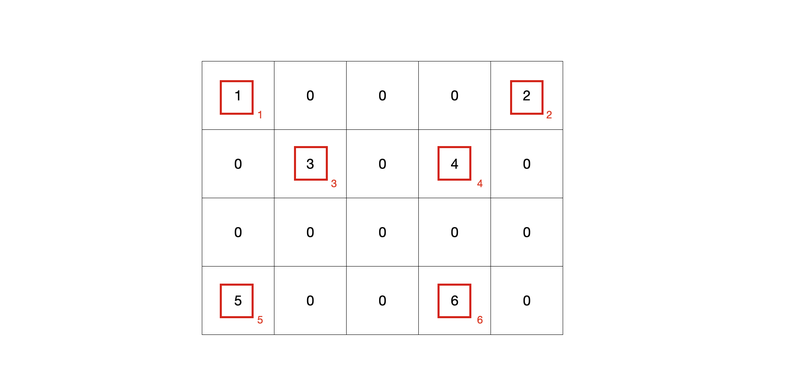


- **data**는 0이 아닌 원소를 차례로 기입한 값이다.

>data = [1, 2, 3, 4, 5, 6]

- **indices**는 data의 각 요소가 어느 열(column)에 있는지를 표현한 index이다.

>indices = [0, 4, 1, 3, 0, 3]

- **indptr**은 각 행(row)에서 0이 아닌 첫 번째 원소가 data 리스트에서 의 몇 번째에 해당하는지와 마지막에 data 벡터의 길이를 추가한 값이다. 이를 통해 data의 요소들이 어느 행(row)에 있는지를 알 수 있는데 다만 예시의 세 번째 행처럼 0이 아닌 원소가 없는 경우엔 그 다음 행의 값과 같은 값을 넣었다.

>indptr = [0, 2, 4, 4, 6]

- 이를 통해 data[0:2]는 첫 번째 행, data[2:4]는 두 번째 행, data[4:4]는 세 번째 행, data[4:6]는 네 번째 행에 위치함을 나타낼 수 있게 된다.


#### 다음과 같이 표현되는 CSR Matrix를 (4,4) matrix 형태로 다시 그려 보면

>data = np.array([1,3,5,6,2,11,7,9,10,12])
>
>indices = np.array([1,2,3,0,1,3,1,2,2,3])
>
>indptr = np.array([0,3,6,8,10])

#### 아래와 같이 될 것이다.

>matrix([[0, 1, 3, 5], [6, 2, 0, 11], [0, 7, 9, 0], [0, 0, 10, 12]])


- csr_matrix를 [만드는 방법](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)은 다양하게 있다.
- 현재 data와 같은 데이터 구조에 적합한 방식은 위 링크(혹은 아래 사진)에서 4번째로 설명하고 있는 방법이다.

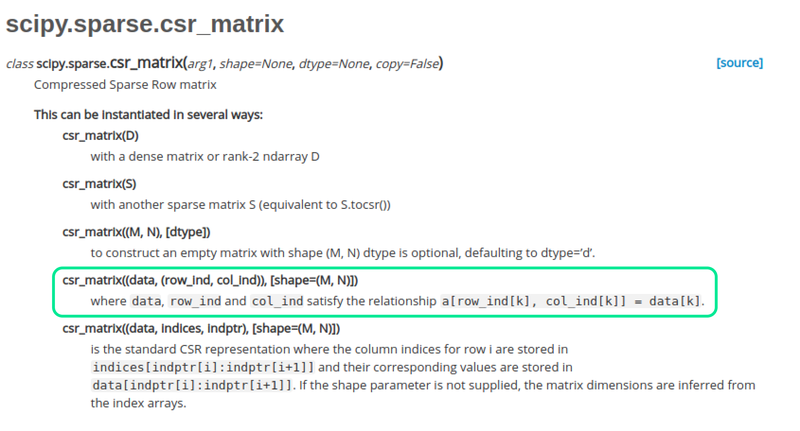
<center>[https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html]
</center>

In [37]:
# 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['title'].nunique()

csr_data = csr_matrix((ratings.counts, (ratings.user_id, ratings.title)), shape= (num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

### 5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 보자.
___


### MF 모델 학습하기

[implicit](https://github.com/benfred/implicit) 패키지를 사용하여 학습해 보자.

- `implicit` 패키지는 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지이다.
- 이 패키지에 구현된 `als(AlternatingLeastSquares) 모델`을 사용하겠다.

In [38]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 의미를 이해하진 못했다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

AlternatingLeastSquares 클래스의 __init__ 파라미터를 살펴보자.

1. factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지
2. regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
3. use_gpu : GPU를 사용할 것인지
4. iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지

1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 한다.



In [39]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [40]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [41]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났다! 아래 2가지 사항을 살펴보자.

1. "castle_money" 벡터와 "Mission: Impossible 2 (2000)"의 **벡터를 어떻게 만들고 있는지**
2. 두 벡터를 **곱하면 어떤 값**이 나오는지


In [42]:
c_money, impossible2 = user_to_idx['castle_money'], movie_to_idx['Mission: Impossible 2 (2000)']
c_money_vector, impossible2_vector = als_model.user_factors[c_money], als_model.item_factors[impossible2]

print('ok')

ok


In [43]:
c_money_vector

array([-0.09803833, -0.47516063, -0.9712087 ,  0.81572443,  0.5953881 ,
       -0.15162028,  0.30764544, -0.5878737 ,  1.1176938 , -0.9982266 ,
       -0.7606727 ,  0.5651739 , -0.04369332,  0.5565814 , -0.10484558,
       -0.10470447, -0.62315214,  0.12156352, -0.8146479 ,  0.539967  ,
        0.18110633, -0.99714625, -0.37926117,  0.50017715, -0.6921984 ,
        0.46090114, -0.30039594, -0.32414618,  0.64154935, -0.2859759 ,
       -0.29907325,  1.3325702 ,  0.13547812, -0.18130888,  0.20158833,
        0.05326618,  0.04342658, -0.7771714 , -0.43576235,  1.1772283 ,
       -0.33591413, -0.10449667, -0.34613082,  0.09795533, -0.9149855 ,
       -0.40746233,  0.22832991,  0.47957534,  0.03209193,  0.9468175 ,
        0.35084754, -0.05061329, -1.136828  , -0.44478056,  0.04145824,
        0.75179535,  0.7343172 , -0.78894955, -0.2439883 , -0.76753235,
        0.50491905, -0.0210436 ,  0.24299085, -0.23466203,  0.6599876 ,
        0.2032239 , -0.4577114 ,  1.2070289 , -0.17829873, -0.03

In [44]:
c_money_vector.shape

(100,)

In [45]:
impossible2_vector

array([-1.96872912e-02, -2.09134072e-03, -1.40885357e-02, -1.81194060e-02,
        1.27081070e-02, -6.26823492e-03,  4.30469913e-03, -4.77085151e-02,
        2.65496802e-02,  7.01075234e-03, -1.55834798e-02,  1.25451596e-03,
       -7.25046033e-04,  2.18417179e-02,  7.19002122e-03,  1.85436737e-02,
       -1.47037879e-02, -4.98177903e-03,  3.70151969e-03,  2.37638913e-02,
        1.83618441e-02, -2.91177835e-02, -3.71427238e-02,  1.29018771e-02,
        1.07389027e-02,  1.55651886e-02,  1.94262676e-02, -1.01197185e-02,
        2.52793115e-02,  1.62077453e-02,  9.99529846e-03,  6.71786303e-03,
        2.55915932e-02, -7.20212981e-03,  1.05274692e-02,  1.13919647e-02,
       -1.15781166e-02, -2.06578523e-03,  2.01803744e-02,  3.60003337e-02,
        2.69626770e-02, -1.31803583e-02,  1.16221402e-02,  6.94721844e-03,
        7.44726392e-04,  4.14819131e-03,  2.68871244e-02,  9.21635795e-03,
        3.50728817e-02,  1.05332639e-02,  2.81174574e-02, -1.04211981e-03,
       -1.96264647e-02,  

In [46]:
impossible2_vector.shape

(100,)

In [47]:
# "castle_money" 와 "Mission: Impossible 2 (2000)" 를 내적하는 코드
np.dot(c_money_vector, impossible2_vector)

0.49988055

- 낮은 수치인 0.46 정도가 나왔다. 더 높은 수치가 나와야 할 것 같은데 factors를 늘리거나 iterations를 늘려야 할 것 같다.

### 6) 내가 선호하는 5가지 영화 중 하나와 그 외의 영화 하나를 골라 훈련된 모델이 예측한 나의 선호도를 파악해 보자.
___


모델이 나의 Matrix, The (1999)에 대한 선호도를 어떻게 예측할지 다시 한 번 보자.


In [48]:
matrix = movie_to_idx['Matrix, The (1999)']
matrix_vector = als_model.item_factors[matrix]
np.dot(c_money_vector, matrix_vector)

0.6284808

- 선호하지 않는 영화는 어떻게 예측하는지 보자.

In [49]:
b_heart = movie_to_idx['Braveheart (1995)']
b_heart_vector = als_model.item_factors[b_heart]
np.dot(c_money_vector, b_heart_vector)

0.25399345

In [50]:
m_black = movie_to_idx['Men in Black (1997)']
m_black_vector = als_model.item_factors[m_black]
np.dot(c_money_vector, m_black_vector)

0.31527215

- 선호 영화 list에 없는 영화는 확실히 낮은 값으로 예측하는 것을 확인할 수 있다.

### 7) 내가 좋아하는 영화와 비슷한 영화를 추천받아 보자.
___


### 비슷한 아티스트 찾기

`AlternatingLeastSquares` 클래스에 구현되어 있는 `similar_items` 메서드를 통하여 비슷한 영화를 찾아보자.



In [51]:
favorite_movie = 'Terminator 2: Judgment Day (1991)'
movie_id = movie_to_idx[favorite_movie]
similar_movie = als_model.similar_items(movie_id, N=15)
similar_movie

[(92, 0.9999998),
 (124, 0.7603102),
 (62, 0.716198),
 (107, 0.70791155),
 (175, 0.6351194),
 (200, 0.611691),
 (141, 0.50201243),
 (87, 0.4704279),
 (75, 0.4406925),
 (3466, 0.41322342),
 (651, 0.41009352),
 (375, 0.40566877),
 (193, 0.3976017),
 (82, 0.38896018),
 (44, 0.37807268)]

(영화의 idx, 유사도) Tuple 로 반환하고 있다. 영화의 idx를 다시 영화의 이름으로 매핑시켜서 제목을 확인해 보자.


In [52]:
#movie_to_idx 를 뒤집어, index로부터 movie 이름을 얻는 dict를 생성합니다. 
idx_to_movie = {v:k for k,v in movie_to_idx.items()}
[idx_to_movie[i[0]] for i in similar_movie]

['Terminator 2: Judgment Day (1991)',
 'Matrix, The (1999)',
 'Total Recall (1990)',
 'Jurassic Park (1993)',
 'Men in Black (1997)',
 'Terminator, The (1984)',
 'Fugitive, The (1993)',
 'Braveheart (1995)',
 'Hunt for Red October, The (1990)',
 'Schlafes Bruder (Brother of Sleep) (1995)',
 'Aliens (1986)',
 'Face/Off (1997)',
 'Alien (1979)',
 'Lost World: Jurassic Park, The (1997)',
 'Star Wars: Episode IV - A New Hope (1977)']

- 반복해서 확인하기 위해 위의 코드를 함수로 만들어 확인해 보자.

In [53]:
def get_similar_movie(movie_title: str):
    movie_id = movie_to_idx[movie_title]
    similar_movie = als_model.similar_items(movie_id)
    similar_movie = [idx_to_movie[i[0]] for i in similar_movie]
    return similar_movie

print("ok")

ok


In [54]:
get_similar_movie('Mission: Impossible (1996)')

['Mission: Impossible (1996)',
 'True Lies (1994)',
 'Conspiracy Theory (1997)',
 'Con Air (1997)',
 'Rock, The (1996)',
 'Mask of Zorro, The (1998)',
 'GoldenEye (1995)',
 'Lost World: Jurassic Park, The (1997)',
 'Rising Sun (1993)',
 'Batman Returns (1992)']

In [55]:
get_similar_movie('Matrix, The (1999)')

['Matrix, The (1999)',
 'Terminator 2: Judgment Day (1991)',
 'Total Recall (1990)',
 'Fugitive, The (1993)',
 'Terminator, The (1984)',
 'Jurassic Park (1993)',
 'Fifth Element, The (1997)',
 'Face/Off (1997)',
 'Men in Black (1997)',
 'Star Wars: Episode IV - A New Hope (1977)']

- 생각보다 잘 추천되는 것을 확인할 수 있었다.

### 8) 내가 가장 좋아할 만한 영화들을 추천받아 봅시다.
___


### 유저에게 아티스트 추천하기

`AlternatingLeastSquares` 클래스에 구현되어 있는 `recommend` 메서드를 통하여 내가 가장 좋아할 만한 영화를 추천받아보자. `filter_already_liked_items` 는 유저가 이미 평가한 아이템은 제외하는 Argument이다.

In [56]:
user = user_to_idx['castle_money']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(67, 0.44412136),
 (372, 0.4290402),
 (62, 0.39929646),
 (107, 0.3767066),
 (193, 0.35748154),
 (651, 0.34657902),
 (44, 0.32760164),
 (175, 0.31527212),
 (117, 0.30676645),
 (60, 0.29575592),
 (64, 0.29167077),
 (141, 0.29159683),
 (38, 0.27914155),
 (346, 0.25916395),
 (746, 0.2586267),
 (87, 0.25399345),
 (82, 0.25013053),
 (194, 0.23904583),
 (1537, 0.22872652),
 (375, 0.2245456)]

In [57]:
[idx_to_movie[i[0]] for i in movie_recommended]

['Gladiator (2000)',
 'X-Men (2000)',
 'Total Recall (1990)',
 'Jurassic Park (1993)',
 'Alien (1979)',
 'Aliens (1986)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Men in Black (1997)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Fugitive, The (1993)',
 'Sixth Sense, The (1999)',
 'Patriot, The (2000)',
 'Perfect Storm, The (2000)',
 'Braveheart (1995)',
 'Lost World: Jurassic Park, The (1997)',
 'Die Hard (1988)',
 'U-571 (2000)',
 'Face/Off (1997)']

- `AlternatingLeastSquares` 클래스에 구현된 `explain` 메서드를 사용하면 내가 기록을 남긴 데이터 중 **이 추천에 기여한 정도**를 확인할 수 있다.

In [58]:
x_men = movie_to_idx['X-Men (2000)']
explain = als_model.explain(user, csr_data, itemid=x_men)

- 이 method는 추천한 콘텐츠의 점수에 기여한 내가 기록을 남긴 콘텐츠와 기여도를 반환한다. 어떤 영화들이 이 추천에 얼마나 기여하고 있는 걸까?

In [59]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('Mission: Impossible 2 (2000)', 0.144803567468386),
 ('Matrix, The (1999)', 0.1310624354353018),
 ('Mission: Impossible (1996)', 0.06965368861598346),
 ('Terminator, The (1984)', 0.03943310720948868),
 ('Terminator 2: Judgment Day (1991)', 0.03271683912984855)]

- "Mission: Impossible 2 (2000)" 와 "Matrix, The (1999)" 의 합이 약 0.3으로 가장 높은 기여를 한 것으로 확인된다.


## 회고

### 어려웠던 점

- 데이터를 자유롭게 다루는 부분이 부족하다고 느껴져서 개선을 위해 노력해야겠다고 반성했다.
- 이번 데이터는 대체로 잘 정리되어 있는 데이터이기에 큰 걸림돌은 없이 참고하여 작업하기에 괜찮았다고 생각되었다.
- Matrix Factorization(MF), CSR(Compressed Sparse Row) Matrix 의 개념을 이해하는데 쉽지 않았던 것 같다.
- 반복학습을 통해서 내것으로 만들어야겠다.

### 최종 정리

- 내가 좋아하는 영화와 비슷한 추천 영화들에 대해서 살펴보면, 대체적으로 액션, 어드벤처, 블록버스터와 같은 장르의 영화들이 추천되었다.
- 내가 재밌게 본 영화나 좋아할만한 영화들이 추천된 것을 보면, 해당 장르에 대해서는 추천 시스템 결과에 신뢰할 수 있다고 생각되었다.
- 이번 프로젝트를 통해서 어떤 내용들을 바탕으로 추천시스템이 구성되고 운영되는지를 조금이나마 알게되는 계기가된 것 같다.
- 또한 좋아했던 영화들을 보면서 과거의 회상하며 옛 추억을 떠올릴 수 있었던 프로젝트라 기억에 남을 것 같다.